Import the necessary linraries

In [1]:
import os
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pybboxes as pbx
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Function to calculate the iou scores

def intersection_over_union(gt, pred):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(gt[0], pred[0])
    yA = max(gt[1], pred[1])
    xB = min(gt[2], pred[2])
    yB = min(gt[3], pred[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1)
    boxBArea = (pred[2] - pred[0] + 1) * (pred[3] - pred[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

## create  the prediction table for Yolo Lite Model with Augmentation

In [3]:
# Defining the paths 

gt_labels ="D:/cat_id/test/yolo_test/labels"  # ground truth path

pred_labels = "D:/cat_id/yolov5_training_sharing/runs/detect/exp45/labels"# predicted labels

img_path = "D:/cat_id/test/yolo_test/images"  # images path

In [4]:
# create a the prediction table for yolo v5 lite model with augmentation


df = pd.DataFrame(columns = ['Image', 'detections','IOU', 'Confidence','o_class','p_class'])

for i in os.listdir(img_path):
    im = img_path + "/"+i
    gt = gt_labels + "/"+str(i)[:-4] + '.txt'
    pt = pred_labels + "/"+str(i)[:-4] +'.txt'

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        gt_l = pd.read_csv(gt,header = None,sep=' ') 
        if (os.path.exists(pt)) ==True:
            pt_l = pd.read_csv(pt,header = None,sep=' ') 
            num_prd = len(pt_l)
            if num_prd == 1:
                box2 = pt_l.iloc[0].values
                pred_clas = box2[0]
                pred_conf = box2[-1]
                b2 = pbx.convert_bbox(box2[1:-1], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                
                for row in range(0,len(gt_l)):
                    box = gt_l.iloc[row].values
                    o_cls = box[0]
                    if box[-2]>1:
                        box[-2]=1
                    if box[-1]>1:
                        box[-1]=1
                    if box[1]==0:
                        box[1]=0.01
                    if box[-1]==0:
                        box[-1]=0.01
                    b1 = pbx.convert_bbox(box[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                    iou = intersection_over_union(b1,b2)

                    df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': row+1,'IOU': round(iou,2),'Confidence': round(pred_conf,2),'o_class':o_cls,'p_class': pred_clas }

            elif num_prd >1:
                pred_conf = 0
                pred_clas = 'multi-face'
                iou = 'NA'
                for nu in range(num_prd):
                    if pt_l.iloc[nu].values[-1]>pred_conf:
                        pred_conf=pt_l.iloc[nu].values[-1]
                        pred_clas=pt_l.iloc[nu].values[0]
                for row in range(0,len(gt_l)):
                    box = gt_l.iloc[row].values
                    o_cls = box[0]
                    df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': row+1,'IOU': iou,'Confidence': pred_conf,'o_class':o_cls,'p_class': pred_clas }
            

        else:
            pred_conf = 'NA'
            pred_clas = 'other'
            iou = 'NA'
            for row in range(0,len(gt_l)):
                box = gt_l.iloc[row].values
                o_cls = box[0]
                df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': row+1,'IOU': iou,'Confidence': pred_conf,'o_class':o_cls,'p_class': pred_clas }

    else:
        img = cv2.imread(im)
        if (os.path.exists(pt)) :
            pt_l = pd.read_csv(pt,header = None,sep=' ') 
            num_prd = len(pt_l)
            if num_prd == 1:
                box2 = pt_l.iloc[0].values
                pred_clas = box2[0]
                pred_conf = box2[-1]
                iou ='NA'
                o_cls = 'other'
                df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': 1,'IOU': iou,'Confidence': round(pred_conf,2),'o_class':o_cls,'p_class': pred_clas }

            elif num_prd >1:
                pred_conf = 0
                pred_clas = 'multi-face'
                for nu in range(num_prd):
                    if pt_l.iloc[nu].values[-1]>pred_conf:
                        pred_conf=pt_l.iloc[nu].values[-1]
                        pred_clas=pt_l.iloc[nu].values[0]
                iou = 'NA'
                o_cls = 'other'
                df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': 1,'IOU': iou,'Confidence': pred_conf,'o_class':o_cls,'p_class': pred_clas }

        else:
            pred_conf = 'NA'
            pred_clas = 'other'
            iou = 'NA'
            o_cls = 'other'
            df.loc[len(df)+1]  = {'Image': i[:-4], 'detections': 0,'IOU': iou,'Confidence': pred_conf,'o_class':o_cls,'p_class': pred_clas }
    
df

,Image,detections,IOU,Confidence,o_class,p_class
1,00000001_012,1,0.88,0.89,0.0,0.0
2,00000001_027,1,0.94,0.83,0.0,0.0
3,00000001_029,1,0.92,0.91,0.0,0.0
4,00000003_009,1,0.91,0.92,0.0,0.0
5,00000004_003,1,0.88,0.91,0.0,0.0
...,...,...,...,...,...,...
6996,yorkshire_terrier_14,1,0.82,0.8,1.0,1.0
6997,yorkshire_terrier_140,1,0.78,0.8,1.0,1.0
6998,yorkshire_terrier_142,1,0.91,0.87,1.0,1.0
6999,yorkshire_terrier_144,1,0.82,0.54,1.0,1.0


In [5]:
df["IOU"]=df["IOU"].apply(lambda x: 0 if x=="NA" else x)

In [6]:
df["IOU"]=pd.to_numeric(df["IOU"])
len(df[df["IOU"]>0.5])

4741

In [7]:
# save the results

df.to_excel('D:/cat_id/deep_dive/2112/extra_dogs.xlsx',index=False)

In [8]:
df = pd.read_excel('D:/cat_id/deep_dive/2112/extra_dogs.xlsx',sheet_name=0)
df.head()

,Image,detections,IOU,Confidence,o_class,p_class
0,00000001_012,1,0.88,0.89,0,0
1,00000001_027,1,0.94,0.83,0,0
2,00000001_029,1,0.92,0.91,0,0
3,00000003_009,1,0.91,0.92,0,0
4,00000004_003,1,0.88,0.91,0,0


In [9]:
df["p_class"].value_counts()

1        2841
0        2267
other    1892
Name: p_class, dtype: int64

In [11]:
df["o_class"]=df["o_class"].apply(lambda x:3 if x=="other" else x)
df["p_class"]=df["p_class"].apply(lambda x:3 if x=="other" else x)
# df["p_class"]=df["p_class"].apply(lambda x:2 if x=="multi-face" else x)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(df["o_class"],df["p_class"]))
print(confusion_matrix(df["o_class"],df["p_class"]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2249
           1       0.99      0.96      0.98      2929
           3       0.94      0.97      0.96      1822

    accuracy                           0.98      7000
   macro avg       0.97      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000

[[2243    0    6]
 [   1 2818  110]
 [  23   23 1776]]


### Cat misclassification analysis

In [32]:
cat_other = df[(df['o_class']==0) & (df['p_class']==3)]['Image'].values
dog_other = df[(df['o_class']==1) & (df['p_class']==3)]['Image'].values

# Defining the paths 

gt_labels ="D:/cat_id/test/yolo_test/labels"  # ground truth path

pred_labels = "D:/cat_id/yolov5/runs/detect/exp19/labels"# predicted labels

img_path = "D:/cat_id/test/yolo_test/images"  # images path

In [ ]:
cat_other = df[(df['o_class']==0) & (df['p_class']==3)]['Image'].values
dog_other = df[(df['o_class']==1) & (df['p_class']==3)]['Image'].values

# Defining the paths 

gt_labels ="D:/cat_id/test/yolo_test/labels/"  # ground truth path

pred_labels = "D:/cat_id/yolov5/runs/detect/exp19/labels/"# predicted labels

img_path = "D:/cat_id/test/yolo_test/labels/"  # images path

D:/cat_id/test/yolo_test/images/00000108_005.jpg D:/cat_id/test/yolo_test/labels/00000108_005.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000108_005.txt
D:/cat_id/test/yolo_test/images/00000559_015.jpg D:/cat_id/test/yolo_test/labels/00000559_015.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000559_015.txt
D:/cat_id/test/yolo_test/images/00000569_019.jpg D:/cat_id/test/yolo_test/labels/00000569_019.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000569_019.txt
D:/cat_id/test/yolo_test/images/00000601_005.jpg D:/cat_id/test/yolo_test/labels/00000601_005.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000601_005.txt
D:/cat_id/test/yolo_test/images/00000877_014.jpg D:/cat_id/test/yolo_test/labels/00000877_014.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000877_014.txt
D:/cat_id/test/yolo_test/images/00000971_001.jpg D:/cat_id/test/yolo_test/labels/00000971_001.txt D:/cat_id/yolov5/runs/detect/exp19/labels/00000971_001.txt
D:/cat_id/test/yolo_test/images/00001202_021.jpg D:/cat_id

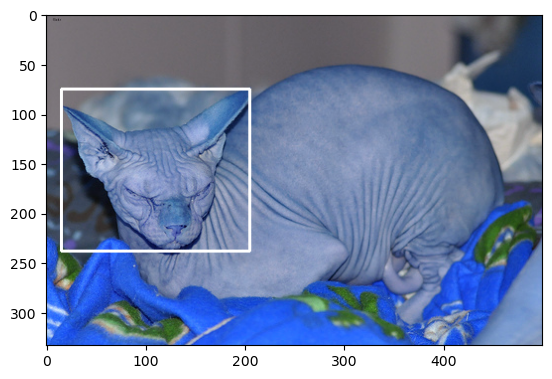

In [33]:
#C:\Users\anandu.nandakuma\Desktop\Cat_id\yolo matrics\v5lite_aug\images

for i in cat_other:
    im = img_path + "/"+str(i) + '.jpg'
    gt = gt_labels + "/"+str(i) + '.txt'
    pt = pred_labels + "/"+str(i) +'.txt'
    print(im,gt,pt)

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            im = img_path+"/"+str(i)+'.png'
            img = cv2.imread(im)

        gt_l = pd.read_csv(gt, sep=" ",header=None)

        for row in range(0,gt_l.shape[0]):
            box = gt_l.iloc[row].values
            box2 = box[1:] 
            if box2[-2]>1:
                box2[-2]=1
            if box2[-1]==0:
                box2[-1]=0.01
            if box2[-1]>1:
                box2[-1]=1
            if box2[1]==0:
                box2[1]=0.01
            # print(im)
            b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
            img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

    cv2.imwrite('D:/cat_id/deep_dive/0211/misclassification_analysis/cat_as_other/'+ i+'.jpg', img)

    plt.imshow(img)

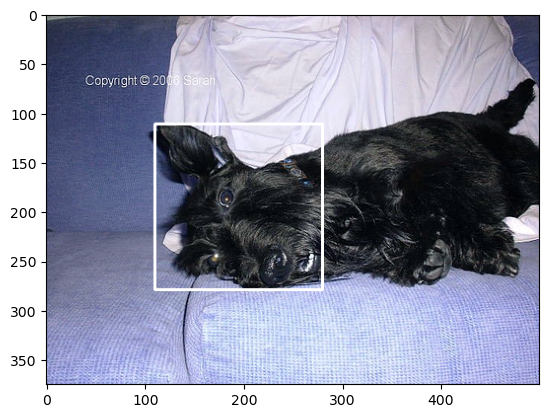

In [34]:
# dogs as others

#C:\Users\anandu.nandakuma\Desktop\Cat_id\yolo matrics\v5lite_aug\images

for i in dog_other:
    im = img_path + "/"+str(i) + '.jpg'
    gt = gt_labels + "/"+str(i) + '.txt'
    pt = pred_labels +"/"+ str(i) +'.txt'


    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            im = img_path+"/"+str(i)+'.png'
            img = cv2.imread(im)

        gt_l = pd.read_csv(gt, sep=" ",header=None)

        for row in range(0,gt_l.shape[0]):
            box = gt_l.iloc[row].values
            box2 = box[1:] 
            if box2[-2]>1:
                box2[-2]=1
            if box2[-1]==0:
                box2[-1]=0.01
            if box2[-1]>1:
                box2[-1]=1
            if box2[1]==0:
                box2[1]=0.01
            # print(im)
            b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
            img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

    cv2.imwrite('D:/cat_id/deep_dive/0211/misclassification_analysis/dog_as_other/'+ i+'.jpg', img)

    plt.imshow(img)

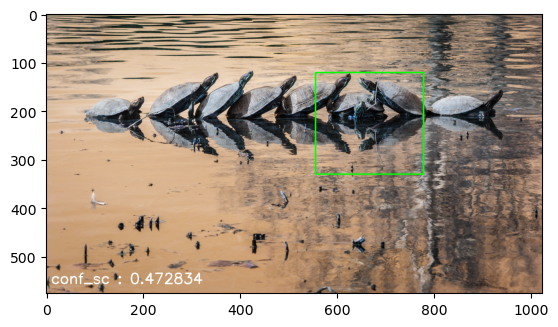

In [36]:
# others as dogs
other_dog = df[(df['o_class']==3) & (df['p_class']==0)]['Image'].values

#C:\Users\anandu.nandakuma\Desktop\Cat_id\yolo matrics\v5lite_aug\images

for i in other_dog:
    im = img_path + "/"+str(i) + '.jpg'
    pt = pred_labels + "/"+str(i) +'.txt'

    img = cv2.imread(im)
    if img is None:
        im = img_path+"/"+str(i)+'.png'
        img = cv2.imread(im)

    if os.path.exists(pt) == True :
        pt_l = pd.read_csv(pt, sep=" ",header=None)
        box = pt_l.iloc[0].values
        # print(box)
        box2 = box[1:-1] 
        b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
        img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)


        text = "conf_sc : "+ str(box[-1])
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.0
        thickness = 2
        position = (10,img.shape[0] - 20 ) 
        color = (255, 255, 255)
        cv2.putText(img, text, position, font, font_scale, color, thickness)
    cv2.imwrite('D:/cat_id/deep_dive/0211/misclassification_analysis/other_as_cat/ '+ i+'.jpg', img)

    plt.imshow(img)
    # break

In [19]:
gt_labels ="D:/cat_id/yolo/test/labels/"  # ground truth path

pred_labels = "D:/cat_id/tflite_nano_results/test_final/exp12/labels/"# predicted labels

img_path = "D:/cat_id/test/yolo_test/images/"  # images path

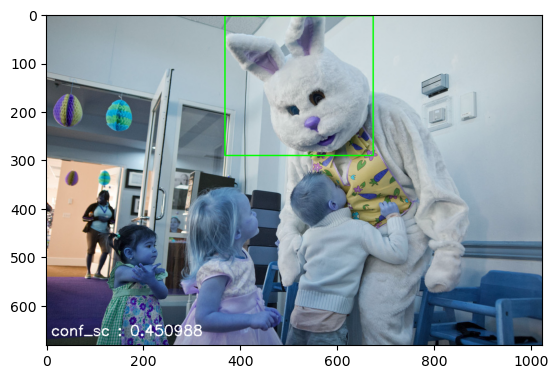

In [ ]:
# others as cats
other_cat = df[(df['o_class']=='other') & (df['p_class']==0)]['Image'].values


for i in other_cat:
    im = img_path + str(i) + '.jpg'
    pt = pred_labels + str(i) +'.txt'

    img = cv2.imread(im)
    if img is None:
        im = img_path+str(i)+'.png'
        img = cv2.imread(im)

    if os.path.exists(pt) == True :
        pt_l = pd.read_csv(pt, sep=" ",header=None)
        box = pt_l.iloc[0].values
        box2 = box[1:-1] 
        b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
        img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)

        text = "conf_sc : "+ str(box[-1])
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.0
        thickness = 2
        position = (10,img.shape[0] - 20 ) 
        color = (255, 255, 255)
        cv2.putText(img, text, position, font, font_scale, color, thickness)
    cv2.imwrite('D:/cat_id/yolo v6/v6-lite-m/v6-lite-m-misclassification-analysis/other_as_cat/'+ i+'.jpg', img)

    plt.imshow(img)
    # break

In [ ]:
len(other_cat)

16

In [ ]:
df=pd.read_excel("C:/Users/uday.bijjala/cat_visual_id_1/production/notebooks/yolo_lite_iou.xlsx")

In [ ]:
df1=df[(df["o_class"]==0) & (df["p_class"]!="multi-face")]
len(df1)

2236

In [ ]:
df1.isna().sum()

Image          0
detections     0
IOU           41
Confidence    41
o_class        0
p_class        0
dtype: int64

In [ ]:
df["IOU"]=df["IOU"].fillna(0)

In [ ]:
gt_labels ="D:/cat_id/yolo/test/labels/"  # ground truth path

pred_labels = "D:/cat_id/yolo v6/v6-lite-m/labels/exp/labels/"# predicted labels

img_path = "D:/cat_id/test/yolo_test/images/"  # images path

In [ ]:
len(df)

7000

In [ ]:
# Cats as dogs
import random
cat_as_dogs = df[(df['o_class']==0) & (df['p_class']==1)]['Image'].values
dog_as_cats = df[(df['o_class']==1) & (df['p_class']==0)]['Image'].values
cat_as_cats=  df[(df['o_class']==0) & (df['p_class']==0)]['Image'].values
dog_as_dogs=  df[(df['o_class']==1) & (df['p_class']==1)]['Image'].values
random.shuffle(cat_as_cats)


In [ ]:
cat_other = df[(df['o_class']==0) & (df['p_class']=='other')]['Image'].values
dog_other = df[(df['o_class']==1) & (df['p_class']=='other')]['Image'].values

In [31]:
other_cat=df[(df['o_class']=="other") & (df['p_class']==0)]['Image'].values
other_dog = df[(df['o_class']=="other") & (df['p_class']==1)]['Image'].values

In [27]:
df["o_class"].value_counts()

0.0    959
1.0    357
Name: o_class, dtype: int64

In [ ]:
gt_80_dog=df[(df["IOU"]>=0.8) & (df["o_class"]==1)]["Image"].values
gt_80_cat=df[(df["IOU"]>=0.8) & (df["o_class"]==0)]["Image"].values
fifty_to_70_dog=df[(df["IOU"]>=0.5) & (df["IOU"]<=0.7) & (df["o_class"]==1)]["Image"].values
fifty_to_70_cat=df[(df["IOU"]>=0.5) & (df["IOU"]<=0.7) & (df["o_class"]==0)]["Image"].values
lt_10_dog=df[(df["IOU"]<=0.1) & (df["o_class"]==1) & (df["p_class"]!="multi-face")]["Image"].values
lt_10_cat=df[(df["IOU"]<0.1) & (df["o_class"]==0) & (df["p_class"]!="multi-face")]["Image"].values

In [14]:
df["p_class"].value_counts()

0.0           945
1.0           338
other          22
multi-face     11
Name: p_class, dtype: int64

In [21]:
# For one predictions 
count = 0
for i in other_cat:
    im = img_path + str(i) + '.jpg'
    gt = gt_labels + str(i) + '.txt'
    pt = pred_labels + str(i) +'.txt'

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            im = img_path + str(i) + '.png'
            img = cv2.imread(im)
        else:
            img = cv2.imread(im)
            # yolo_v5_pred = yolo.predict(context_obj,[img],yolo_model_objs)
            
        gt_l = pd.read_csv(gt, sep=" ",header=None)

        for row in range(0,gt_l.shape[0]):
            box = gt_l.iloc[row].values
            box2 = box[1:] 
            if box2[-2]>1:
                box2[-2]=1
            if box2[-1]==0:
                box2[-1]=0.01
            if box2[-1]>1:
                box2[-1]=1
            if box2[1]==0:
                box2[1]=0.01
            # print(box2)
            b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
            img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

        if os.path.exists(pt) == True :
            pt_l = pd.read_csv(pt, sep=" ",header=None)
            pt_bb=[]
            pt_cls =[]

            for row in range(0,pt_l.shape[0]):

                box = pt_l.iloc[row].values
                box2 = box[1:-1] 
                p_clas = ['cat' if box[0]==0 else 'dog']
                b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)
                p_conf = round(box[-1],2)

                iou_list = []
                classes=[]
                for j in range(0,gt_l.shape[0]):
                    box1 = gt_l.iloc[j].values
                    if box1[-2]>1:
                        box1[-2]=1
                    if box1[-1]>1:
                        box1[-1]=1
                    if box1[1]==0:
                        box1[1]=0.01
                    if box1[-1]==0:
                        box1[-1]=0.01
                    b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                    iou = intersection_over_union(b1, b2)
                    iou_list.append(iou)
                    classes.append(box1[0])

                iou = round(max(iou_list),2)
                o = iou_list.index(max(iou_list))
                o_cls = classes[o]

                text = "conf : "+ str(p_conf)
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.75
                thickness = 2
                position = (10,img.shape[0] - 20 ) 
                color = (255, 255, 255)
                cv2.putText(img, text, position, font, font_scale, color, thickness)

                text1 = "IOU : "+ str(iou)
                position1 = (10,img.shape[0] - 45 )
                color = (255, 255, 255)
                cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                text2 = "class  : "+ str(p_clas[0])
                position2 = (10,img.shape[0] - 65 ) 
                color = (255, 255, 255)

                cv2.putText(img, text2, position2, font, font_scale, color, thickness)

            # if (len(yolo_v5_pred[1]) ==1) :

            #     if yolo_v5_pred[1] is None:
            #         continue
            #     else:
            #         for x in range(0,len(yolo_v5_pred[1])):
            #             v5_cls = yolo_v5_pred[0]
            #             bb =  yolo_v5_pred[1][x]
            #             if bb is None:
            #                 continue
            #             else:

            #                 b2 = [bb[0], bb[2], bb[1], bb[3]]
            #                 v5_conf = yolo_v5_pred[2][x]   
            #                 img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)

            #                 iou_list =[]
            #                 classes = []
            #                 for j in range(0,gt_l.shape[0]):
            #                     box1 = gt_l.iloc[j].values
                    
            #                     if box1[-2]>1:
            #                         box1[-2]=1
            #                     if box1[-1]>1:
            #                         box1[-1]=1
            #                     if box1[1]==0:
            #                         box1[1]=0.01
            #                     if box1[-1]==0:
            #                         box1[-1]=0.01
            #                     b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

            #                     iou = intersection_over_union(b1,b2)
            #                     iou_list.append(iou)
            #                     classes.append(box1[0])

            #                 iou = round(max(iou_list),2)
            #                 o = iou_list.index(max(iou_list))
            #                 o_cls = classes[o]

            #                 text = "conf : "+ str(v5_conf)
            #                 font = cv2.FONT_HERSHEY_SIMPLEX
            #                 font_scale = 0.75
            #                 thickness = 2
            #                 position = (0,img.shape[0]-65)
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text, position, font, font_scale, color, thickness)

            #                 text1 = "IOU : "+ str(round(iou,2))
            #                 position1 = (0,img.shape[0]-40) 
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text1, position1, font, font_scale, color, thickness)

            #                 text2 = "class_v5 : "+ str(v5_cls[0])
            #                 position2 = (0,img.shape[0]-85) 
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text2, position2, font, font_scale, color, thickness)
                       
        # cv2.imwrite('D:/cat_id/albumentations_sharing/iou_analysis/less_than_10/dog/'+ i+'.jpg', img)
        cv2.imwrite('D:/cat_id/tflite_nano_results/test_final/misclassification_analysis/other_as_cat/'+ i+'.jpg',img)

        plt.imshow(img)
        # break
        count = count+1

        if count == 100:
            break
        



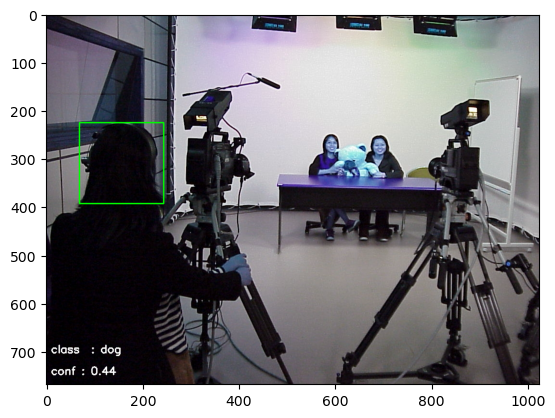

In [33]:
# For one predictions 
count = 0
for i in other_dog:
    im = img_path + str(i) + '.jpg'
    gt = gt_labels + str(i) + '.txt'
    pt = pred_labels + str(i) +'.txt'

    if (os.path.getsize(gt) == 0):
        img = cv2.imread(im)
        if img is None:
            im = img_path + str(i) + '.png'
            img = cv2.imread(im)
        else:
            img = cv2.imread(im)
            # yolo_v5_pred = yolo.predict(context_obj,[img],yolo_model_objs)
            
            # gt_l = pd.read_csv(gt, sep=" ",header=None)

            # for row in range(0,gt_l.shape[0]):
            #     box = gt_l.iloc[row].values
            #     box2 = box[1:] 
            #     if box2[-2]>1:
            #         box2[-2]=1
            #     if box2[-1]==0:
            #         box2[-1]=0.01
            #     if box2[-1]>1:
            #         box2[-1]=1
            #     if box2[1]==0:
            #         box2[1]=0.01
            #     # print(box2)
            #     b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
            #     img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

            if os.path.exists(pt) == True :
                pt_l = pd.read_csv(pt, sep=" ",header=None)
                pt_bb=[]
                pt_cls =[]

                for row in range(0,pt_l.shape[0]):

                    box = pt_l.iloc[row].values
                    box2 = box[1:-1] 
                    p_clas = ['cat' if box[0]==0 else 'dog']
                    b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                    img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)
                    p_conf = round(box[-1],2)

                    iou_list = []
                    classes=[]
                    for j in range(0,gt_l.shape[0]):
                        box1 = gt_l.iloc[j].values
                        if box1[-2]>1:
                            box1[-2]=1
                        if box1[-1]>1:
                            box1[-1]=1
                        if box1[1]==0:
                            box1[1]=0.01
                        if box1[-1]==0:
                            box1[-1]=0.01
                        b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                        iou = intersection_over_union(b1, b2)
                        iou_list.append(iou)
                        classes.append(box1[0])

                    iou = round(max(iou_list),2)
                    o = iou_list.index(max(iou_list))
                    o_cls = classes[o]

                    text = "conf : "+ str(p_conf)
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 0.75
                    thickness = 2
                    position = (10,img.shape[0] - 20 ) 
                    color = (255, 255, 255)
                    cv2.putText(img, text, position, font, font_scale, color, thickness)

                    # text1 = "IOU : "+ str(iou)
                    # position1 = (10,img.shape[0] - 45 )
                    # color = (255, 255, 255)
                    # cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                    text2 = "class  : "+ str(p_clas[0])
                    position2 = (10,img.shape[0] - 65 ) 
                    color = (255, 255, 255)

                    cv2.putText(img, text2, position2, font, font_scale, color, thickness)

            # if (len(yolo_v5_pred[1]) ==1) :

            #     if yolo_v5_pred[1] is None:
            #         continue
            #     else:
            #         for x in range(0,len(yolo_v5_pred[1])):
            #             v5_cls = yolo_v5_pred[0]
            #             bb =  yolo_v5_pred[1][x]
            #             if bb is None:
            #                 continue
            #             else:

            #                 b2 = [bb[0], bb[2], bb[1], bb[3]]
            #                 v5_conf = yolo_v5_pred[2][x]   
            #                 img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)

            #                 iou_list =[]
            #                 classes = []
            #                 for j in range(0,gt_l.shape[0]):
            #                     box1 = gt_l.iloc[j].values
                    
            #                     if box1[-2]>1:
            #                         box1[-2]=1
            #                     if box1[-1]>1:
            #                         box1[-1]=1
            #                     if box1[1]==0:
            #                         box1[1]=0.01
            #                     if box1[-1]==0:
            #                         box1[-1]=0.01
            #                     b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

            #                     iou = intersection_over_union(b1,b2)
            #                     iou_list.append(iou)
            #                     classes.append(box1[0])

            #                 iou = round(max(iou_list),2)
            #                 o = iou_list.index(max(iou_list))
            #                 o_cls = classes[o]

            #                 text = "conf : "+ str(v5_conf)
            #                 font = cv2.FONT_HERSHEY_SIMPLEX
            #                 font_scale = 0.75
            #                 thickness = 2
            #                 position = (0,img.shape[0]-65)
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text, position, font, font_scale, color, thickness)

            #                 text1 = "IOU : "+ str(round(iou,2))
            #                 position1 = (0,img.shape[0]-40) 
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text1, position1, font, font_scale, color, thickness)

            #                 text2 = "class_v5 : "+ str(v5_cls[0])
            #                 position2 = (0,img.shape[0]-85) 
            #                 color = (0, 0, 100)
            #                 cv2.putText(img, text2, position2, font, font_scale, color, thickness)
                       
        cv2.imwrite('D:/cat_id/tflite_nano_results/test_final/misclassification_analysis/other_as_dog/'+ i+'.jpg', img)

        plt.imshow(img)
        # break
        count = count+1

        if count == 100:
            break
        



In [27]:
for i in os.listdir("D:/cat_id/tflite_nano_results/bright_reducing_analysis_original/exp12/labels"):
    if "jpg" in i:
        os.remove(f"D:/cat_id/tflite_nano_results/bright_reducing_analysis_original/exp12/labels/{i}")

In [23]:
len(other_cat)

0